# About Dataset
Description:

The Dangerous Farm Insects Image Dataset is a curated collection of images featuring 15 different types of insects commonly found in agricultural settings. This dataset provides valuable visual resources for studying, identifying, and understanding the characteristics of these potentially harmful insects. Each insect is represented by multiple high-quality images, showcasing their distinct features, colors, and patterns.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
import pathlib
data_dir = pathlib.Path('Images')
data_dir

WindowsPath('Images')

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1464


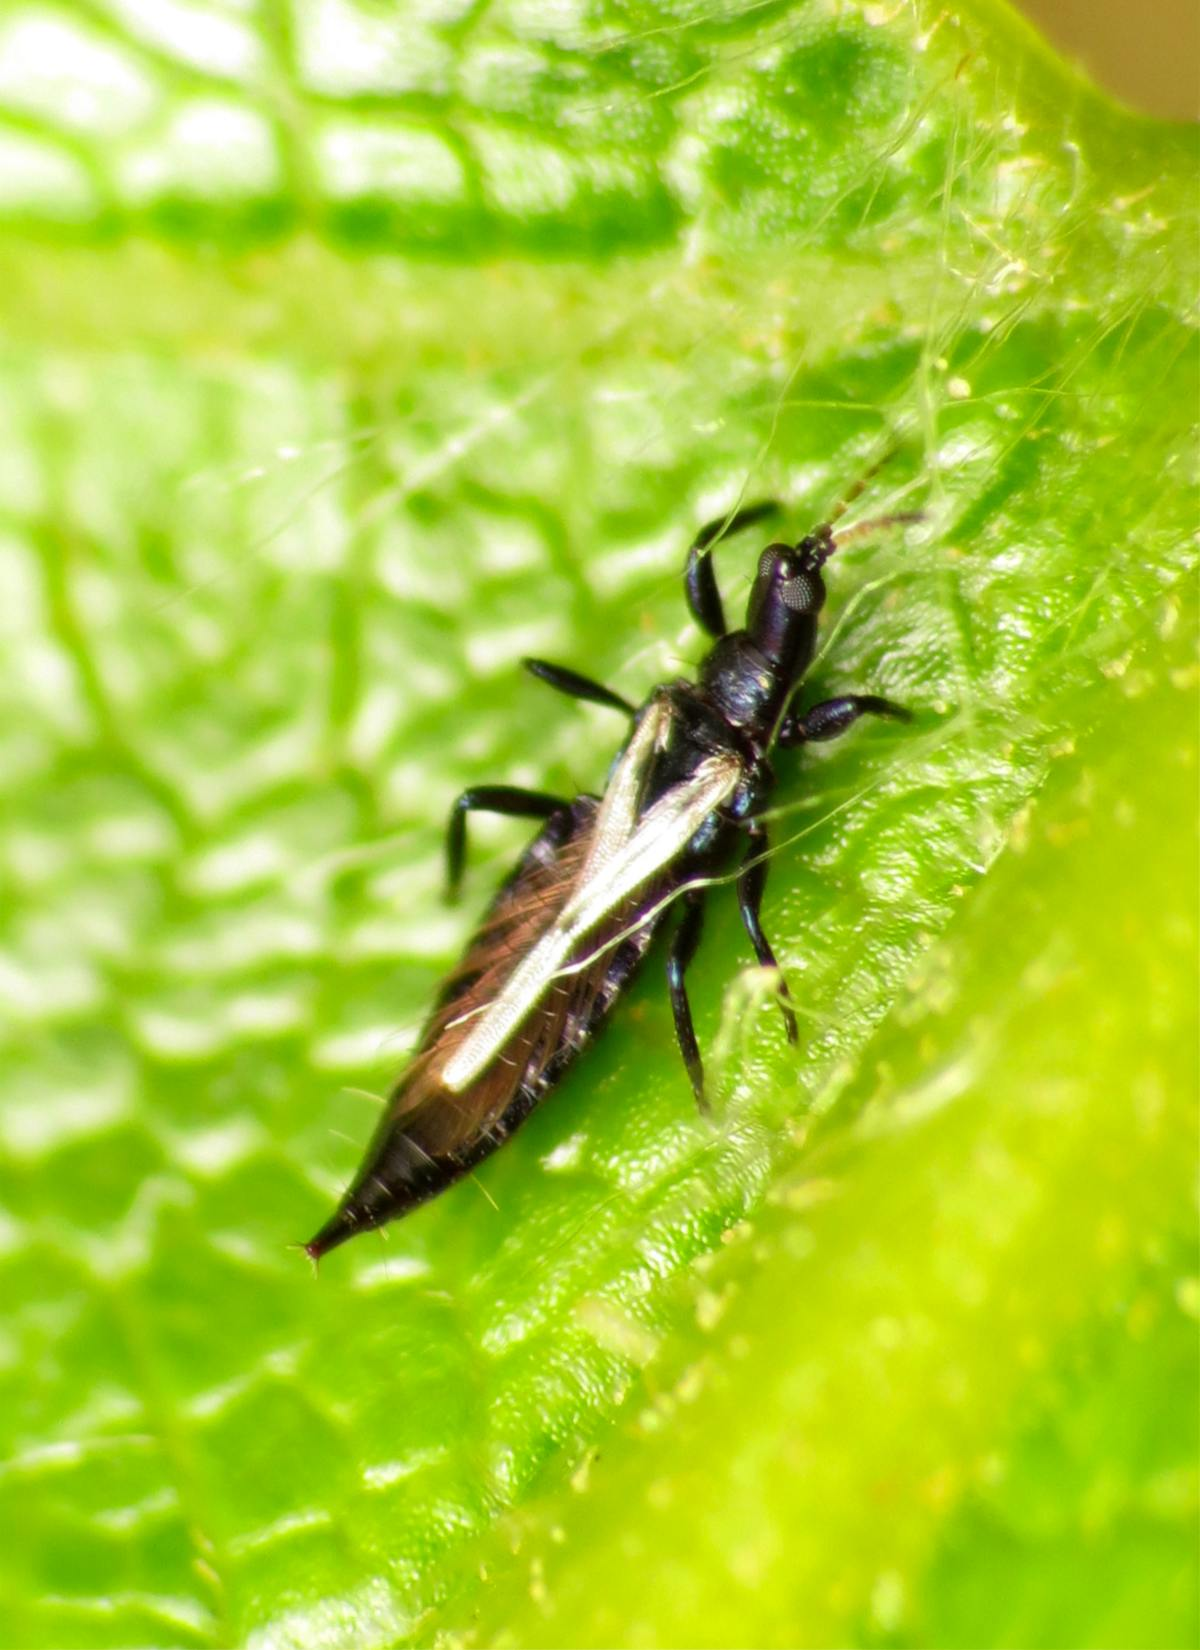

In [4]:
thrips = list(data_dir.glob('Thrips/*'))
PIL.Image.open(str(thrips[0]))

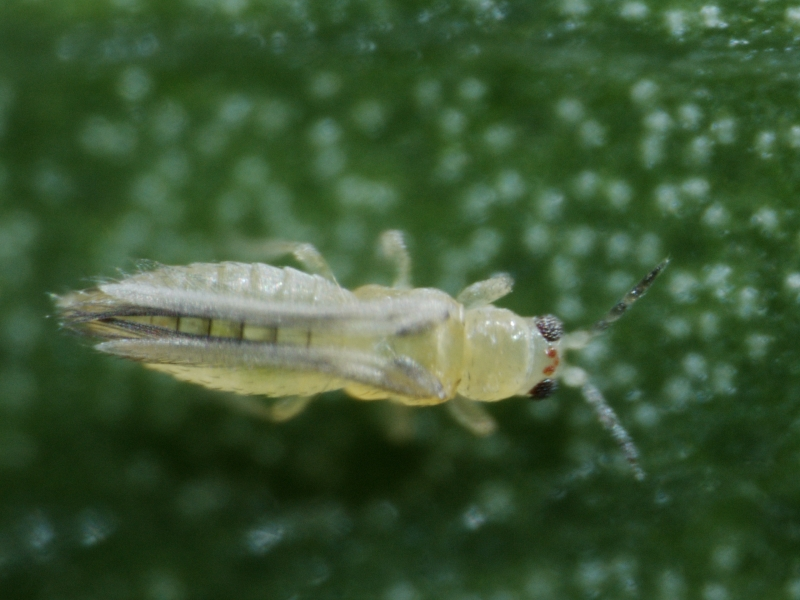

In [5]:
PIL.Image.open(str(thrips[1]))

# Create a dataset

In [6]:
# Define some parameters for the loader:
batch_size = 32
img_height = 224
img_width = 224

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed = 999,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 1591 files belonging to 15 classes.
Using 1273 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed = 999,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 1591 files belonging to 15 classes.
Using 318 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['Africanized Honey Bees (Killer Bees)', 'Aphids', 'Armyworms', 'Brown Marmorated Stink Bugs', 'Cabbage Loopers', 'Citrus Canker', 'Colorado Potato Beetles', 'Corn Borers', 'Corn Earworms', 'Fall Armyworms', 'Fruit Flies', 'Spider Mites', 'Thrips', 'Tomato Hornworms', 'Western Corn Rootworms']


# Visualize the data

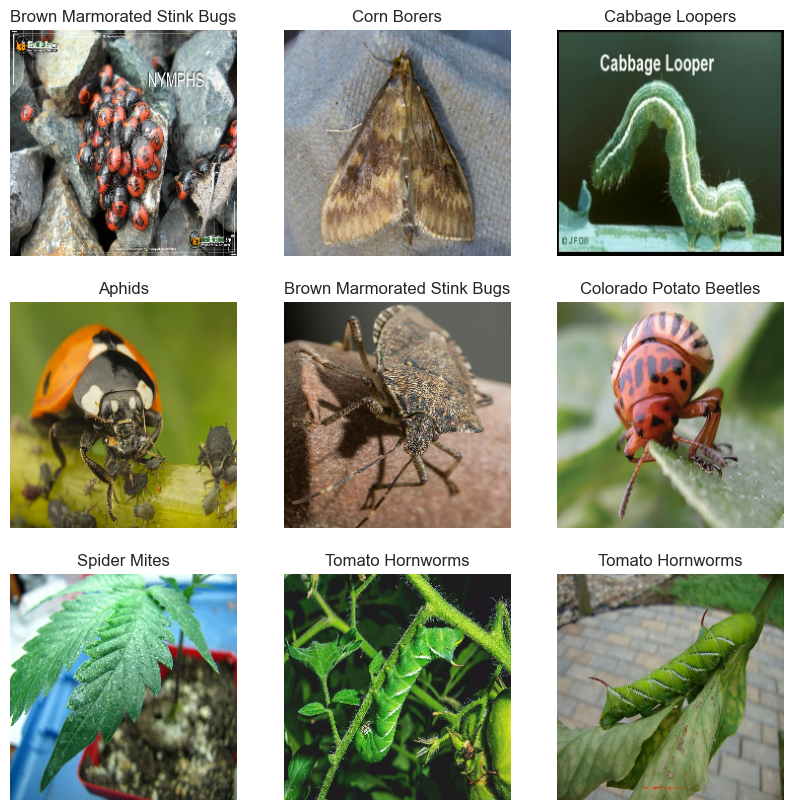

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [12]:
# Configure the dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Creating the model

In [13]:
num_classes = len(class_names)

In [14]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [17]:
epochs=10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
40/40 [==============================] - 22s 430ms/step - loss: 2.7842 - accuracy: 0.0801 - val_loss: 2.7001 - val_accuracy: 0.0597
Epoch 2/10
40/40 [==============================] - 16s 404ms/step - loss: 2.6299 - accuracy: 0.1312 - val_loss: 2.6570 - val_accuracy: 0.1101
Epoch 3/10
40/40 [==============================] - 16s 403ms/step - loss: 2.2695 - accuracy: 0.2852 - val_loss: 2.4412 - val_accuracy: 0.2390
Epoch 4/10
40/40 [==============================] - 17s 429ms/step - loss: 1.6152 - accuracy: 0.4973 - val_loss: 2.4595 - val_accuracy: 0.2830
Epoch 5/10
40/40 [==============================] - 17s 418ms/step - loss: 0.9389 - accuracy: 0.7148 - val_loss: 2.7401 - val_accuracy: 0.2704
Epoch 6/10
40/40 [==============================] - 16s 412ms/step - loss: 0.5801 - accuracy: 0.8602 - val_loss: 3.3774 - val_accuracy: 0.3145
Epoch 7/10
40/40 [==============================] - 16s 402ms/step - loss: 0.3384 - accuracy: 0.9324 - val_loss: 3.4462 - val_accuracy: 0.2987

### Save the model

In [18]:
model.save('insect_model')

INFO:tensorflow:Assets written to: insect_model\assets


INFO:tensorflow:Assets written to: insect_model\assets


# Visualize training results

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

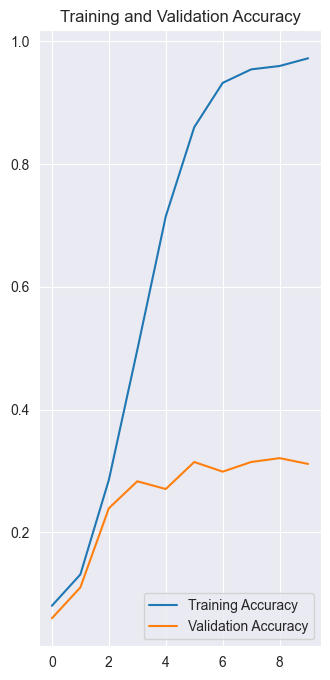

In [20]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

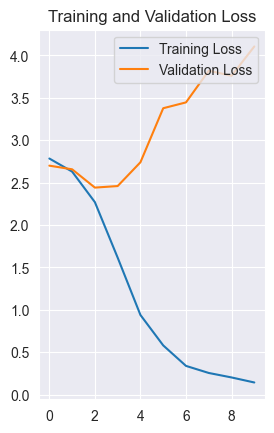

In [21]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Data Augmentation

In [22]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [23]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                 

In [26]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
40/40 [==============================] - 20s 471ms/step - loss: 2.7517 - accuracy: 0.0809 - val_loss: 2.7061 - val_accuracy: 0.1069
Epoch 2/10
40/40 [==============================] - 18s 460ms/step - loss: 2.6566 - accuracy: 0.1115 - val_loss: 2.6094 - val_accuracy: 0.1006
Epoch 3/10
40/40 [==============================] - 18s 459ms/step - loss: 2.5371 - accuracy: 0.1744 - val_loss: 2.4892 - val_accuracy: 0.1730
Epoch 4/10
40/40 [==============================] - 18s 458ms/step - loss: 2.4150 - accuracy: 0.2066 - val_loss: 2.4614 - val_accuracy: 0.1824
Epoch 5/10
40/40 [==============================] - 18s 460ms/step - loss: 2.2994 - accuracy: 0.2412 - val_loss: 2.4402 - val_accuracy: 0.1950
Epoch 6/10
40/40 [==============================] - 19s 467ms/step - loss: 2.2291 - accuracy: 0.2679 - val_loss: 2.4955 - val_accuracy: 0.2390
Epoch 7/10
40/40 [==============================] - 19s 481ms/step - loss: 2.1388 - accuracy: 0.3071 - val_loss: 2.3141 - val_accuracy: 0.2642

### Save the model

In [27]:
model.save('insect_model_aug')

INFO:tensorflow:Assets written to: insect_model_aug\assets


INFO:tensorflow:Assets written to: insect_model_aug\assets


# Visualize training results

Text(0.5, 1.0, 'Training and Validation Accuracy')

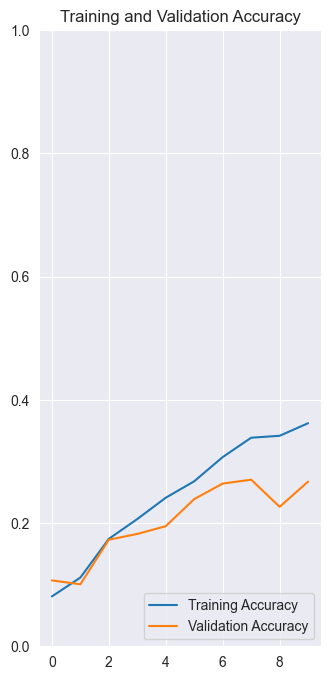

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

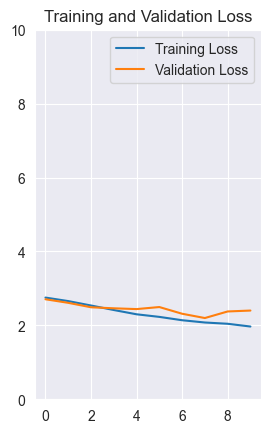

In [29]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.ylim(0,10)
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Transfer learning

In [30]:
# load the model
model = tf.keras.models.load_model('insect_model')

## MobileNet V2

In [31]:
# Rescale to 224 x 224 x 3
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

## Model

In [32]:
IMG_SHAPE = (img_height, img_width) + (3,)
print(IMG_SHAPE)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

(224, 224, 3)


In [33]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


### Feature extraction

In [34]:
base_model.trainable = False

In [35]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [36]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [37]:
num_classes = len(class_names)
num_classes

15

In [38]:
prediction_layer = tf.keras.layers.Dense(num_classes)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 15)


In [39]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = rescale(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [40]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0     

In [42]:
len(model.trainable_variables)

2

In [43]:
epochs = 10

In [44]:
loss0, accuracy0 = model.evaluate(val_ds)

10/10 [==============================] - 5s 356ms/step - loss: 2.9294 - accuracy: 0.0818


In [45]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.93
initial accuracy: 0.08


In [46]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
40/40 [==============================] - 21s 463ms/step - loss: 2.2605 - accuracy: 0.3197 - val_loss: 1.7065 - val_accuracy: 0.4748
Epoch 2/10
40/40 [==============================] - 19s 465ms/step - loss: 1.3394 - accuracy: 0.6025 - val_loss: 1.3087 - val_accuracy: 0.5818
Epoch 3/10
40/40 [==============================] - 19s 481ms/step - loss: 1.0969 - accuracy: 0.6551 - val_loss: 1.1965 - val_accuracy: 0.5943
Epoch 4/10
40/40 [==============================] - 19s 473ms/step - loss: 0.9007 - accuracy: 0.7258 - val_loss: 1.1368 - val_accuracy: 0.6321
Epoch 5/10
40/40 [==============================] - 19s 483ms/step - loss: 0.7991 - accuracy: 0.7510 - val_loss: 1.0804 - val_accuracy: 0.6321
Epoch 6/10
40/40 [==============================] - 19s 471ms/step - loss: 0.7342 - accuracy: 0.7706 - val_loss: 1.0526 - val_accuracy: 0.6604
Epoch 7/10
40/40 [==============================] - 19s 467ms/step - loss: 0.6660 - accuracy: 0.7965 - val_loss: 1.0204 - val_accuracy: 0.6792

In [ ]:
# Save the model
model.save('insect_model_transfer')

In [50]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
#
# loss=history.history['loss']
# val_loss=history.history['val_loss']
#
# epochs_range = range(epochs)
#
# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.ylim(0,1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.ylim(0,1)
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.ylim(0,1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.ylim(0,1)
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.ylim(0,10)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.ylim(0,10)
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

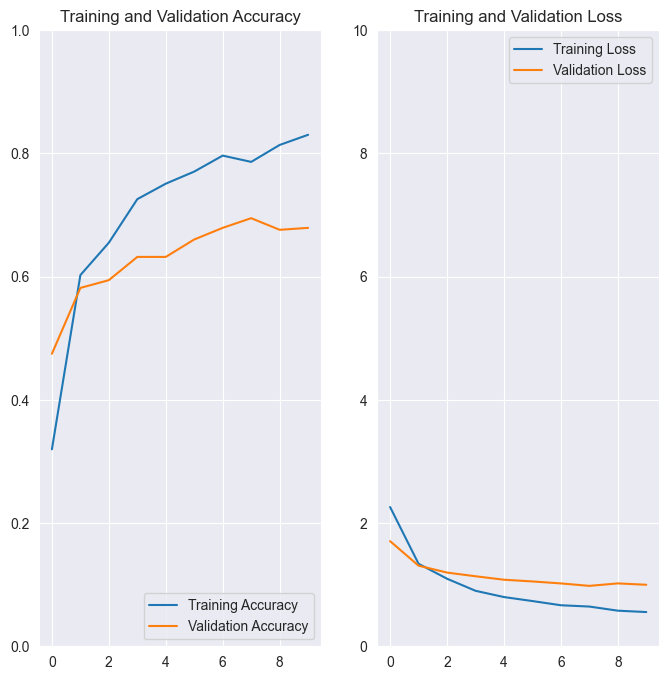

In [51]:
# plt.subplot(1, 2, 2)
# plt.ylim(0,10)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.ylim(0,10)
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')

plot_history(history)


# Fine tuning

In [52]:
base_model.trainable = True

In [53]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  154


In [54]:
fine_tune_at = 100

In [55]:
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [58]:
base_learning_rate = 0.0001
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [59]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0     

In [60]:
len(model.trainable_variables)

56

In [61]:
fine_tune_epochs = 10
total_epochs =  epochs + fine_tune_epochs

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1]
)

Epoch 10/20
40/40 [==============================] - 32s 700ms/step - loss: 5.9012 - accuracy: 0.0833 - val_loss: 2.8817 - val_accuracy: 0.0597
Epoch 11/20
40/40 [==============================] - 26s 657ms/step - loss: 4.0412 - accuracy: 0.0660 - val_loss: 3.0732 - val_accuracy: 0.0629
Epoch 12/20
40/40 [==============================] - 27s 679ms/step - loss: 3.9501 - accuracy: 0.0652 - val_loss: 2.9378 - val_accuracy: 0.0629
Epoch 13/20
40/40 [==============================] - 27s 688ms/step - loss: 3.8843 - accuracy: 0.0676 - val_loss: 3.1038 - val_accuracy: 0.0629
Epoch 14/20
40/40 [==============================] - 28s 701ms/step - loss: 3.8554 - accuracy: 0.0691 - val_loss: 2.7956 - val_accuracy: 0.0755
Epoch 15/20
40/40 [==============================] - 28s 697ms/step - loss: 3.6684 - accuracy: 0.0731 - val_loss: 3.0532 - val_accuracy: 0.0629
Epoch 16/20
40/40 [==============================] - 31s 787ms/step - loss: 3.6953 - accuracy: 0.0636 - val_loss: 2.9068 - val_accuracy: